In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

In [6]:
np.set_printoptions(suppress=True, precision=5)

In [7]:
KatalogPickli="Pickle"

In [8]:
with open("../src/OutDir/odl-1627336600.9345276-gamma-0.001.pickle", "rb") as plik:
    odl=pickle.load(plik)

In [9]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-skalaOrg.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)

In [10]:
szeregi.shape

(4305, 256)

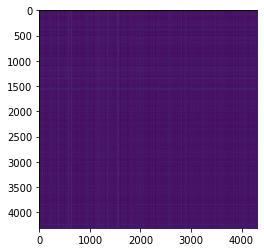

In [11]:
plt.imshow(odl)

# Softdtw

### Wykres silhouette

In [12]:
os.listdir("../src/OutDir")

['1627401450.304716-n_cluster-6-gamma-0.0001.pickle',
 '1627240232.553192-n_cluster-2-gamma-0.001.pickle',
 '1627243419.9636352-n_cluster-4-gamma-0.0141.pickle',
 '1627401593.1109738-n_cluster-4-gamma-0.0001.pickle',
 '1627399605.2035143-n_cluster-2-dtw.pickle',
 '1627240553.9316492-n_cluster-2-gamma-0.0141.pickle',
 '1627241742.0760627-n_cluster-3-gamma-0.0141.pickle',
 '1627401348.8331735-n_cluster-3-gamma-0.0001.pickle',
 '1627401823.3462071-n_cluster-7-gamma-0.0001.pickle',
 '1627241511.0264642-n_cluster-5-gamma-0.001.pickle',
 '1627399646.8112853-n_cluster-3-dtw.pickle',
 '1627241485.5005248-n_cluster-4-gamma-0.001.pickle',
 '1627401975.0319686-n_cluster-5-gamma-0.0001.pickle',
 'odl-1627400825.7058601dtw.pickle',
 '1627241176.9520175-n_cluster-3-gamma-0.001.pickle',
 '1627243668.3268688-n_cluster-5-gamma-0.0141.pickle',
 'odl-1627336556.376963-gamma-0.0141.pickle',
 '1627400848.3745034-n_cluster-2-gamma-0.0001.pickle',
 '1627245002.0377753-n_cluster-7-gamma-0.0141.pickle',
 '1627

In [19]:
reExpr=re.compile(r".*\.001\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [20]:
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [15]:
listaPasujacych

['1627401450.304716-n_cluster-6-gamma-0.0001.pickle',
 '1627240232.553192-n_cluster-2-gamma-0.001.pickle',
 '1627401593.1109738-n_cluster-4-gamma-0.0001.pickle',
 '1627401348.8331735-n_cluster-3-gamma-0.0001.pickle',
 '1627401823.3462071-n_cluster-7-gamma-0.0001.pickle',
 '1627241511.0264642-n_cluster-5-gamma-0.001.pickle',
 '1627241485.5005248-n_cluster-4-gamma-0.001.pickle',
 '1627401975.0319686-n_cluster-5-gamma-0.0001.pickle',
 '1627241176.9520175-n_cluster-3-gamma-0.001.pickle',
 '1627400848.3745034-n_cluster-2-gamma-0.0001.pickle',
 '1627241894.3274837-n_cluster-6-gamma-0.001.pickle',
 '1627243364.038783-n_cluster-7-gamma-0.001.pickle']

In [16]:
listaSilhouetteScore=[]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore.append(ocena)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [17]:
listaSilhouetteScore

[0.14136916154326334,
 0.3698765643980989,
 0.1849497493337277,
 0.28480603356537665,
 0.09137596062482524,
 0.23099725953998548,
 0.2167878108330488,
 0.13817551013558466,
 0.2559921309061617,
 0.35266819945658345,
 0.21910779973617917,
 0.20824944850123375]

ValueError: x and y must have same first dimension, but have shapes (6,) and (12,)

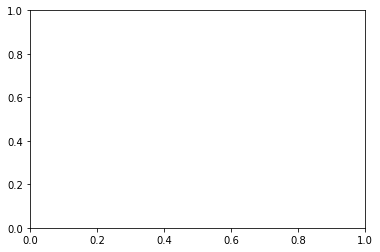

In [18]:
plt.plot(range(2,8), listaSilhouetteScore)

In [ ]:
with open(os.path.join("../src/OutDir/",'1627240232.553192-n_cluster-2-gamma-0.001.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(10,5)
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.ylim(0.015, 0.030)
    plt.plot(model.cluster_centers_[i].ravel())

In [ ]:
with open(os.path.join("../src/OutDir/",'1627241511.0264642-n_cluster-5-gamma-0.001.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.ylim(0.015, 0.035)
    plt.plot(model.cluster_centers_[i].ravel())

In [ ]:
etykiety=model.predict(szeregi)

In [ ]:
k=3
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

### KMeans 

In [45]:
kmeans=KMeans(5)
predictKMeans=kmeans.fit_predict(szeregi)

In [46]:
np.unique(predictKMeans, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 586, 1209,  880,  867,  763]))

In [47]:
silhouette_score(odl, predictKMeans, metric="precomputed")

0.22587274492368453

In [55]:
kmeansSilList=[]
for i in range(2,8):
    kmeans=KMeans(i)
    predictKMeans=kmeans.fit_predict(szeregi)
    ocena=silhouette_score(odl, predictKMeans, metric="precomputed")
    kmeansSilList.append(ocena)
kmeansSilList

[0.3696012482708005,
 0.24454955844596557,
 0.2302044167022431,
 0.2261106971488886,
 0.19139376235692201,
 0.20095840117865396]

### SpectralClustering

In [48]:
spectral=SpectralClustering(5)
predictSpectral=spectral.fit_predict(szeregi)

In [49]:
np.unique(predictSpectral, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 676, 1412,  756,  653,  808]))

In [50]:
silhouette_score(odl, predictSpectral, metric="precomputed")

0.23272014752658124

### Agglomerative Clustering

In [51]:
agglomerative=AgglomerativeClustering(5)
predictAgglomerative=agglomerative.fit_predict(szeregi)

In [52]:
np.unique(predictAgglomerative, return_counts=True)

(array([0, 1, 2, 3, 4]), array([1934,  546,  711,  796,  318]))

In [53]:
silhouette_score(odl, predictAgglomerative, metric="precomputed")

0.12997164695901287